In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.io as pio
from plotly.subplots import make_subplots
import ipywidgets as widgets
from ipywidgets import interactive
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
pd.options.mode.chained_assignment = None

# Đọc dữ liệu

In [ ]:
# df = pd.read_csv("/content/gdrive/MyDrive/DoAnPTDL/crypto-markets.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/file-csv/crypto-markets.csv")

<ipython-input-5-1556befe5e68>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/file-csv/crypto-markets.csv")


In [ ]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,4/28/2013,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,4/29/2013,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,4/30/2013,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,5/1/2013,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,5/2/2013,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679183 entries, 0 to 679182
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   slug         679183 non-null  object 
 1   symbol       679183 non-null  object 
 2   name         679183 non-null  object 
 3   date         679183 non-null  object 
 4   ranknow      679183 non-null  int64  
 5   open         679183 non-null  float64
 6   high         679183 non-null  float64
 7   low          679183 non-null  float64
 8   close        679183 non-null  float64
 9   volume       679183 non-null  int64  
 10  market       679183 non-null  float64
 11  close_ratio  665926 non-null  object 
 12  spread       679183 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 67.4+ MB


In [ ]:
df.describe()

,ranknow,open,high,low,close,volume,market,spread
count,679183.000000,6.791830e+05,6.791830e+05,6.791830e+05,6.791830e+05,6.791830e+05,6.791830e+05,6.791830e+05
mean,722.341635,2.500311e+02,3.077864e+02,2.024765e+02,2.495875e+02,5.190495e+06,1.140418e+08,1.053095e+02
std,406.650250,1.162567e+04,1.511574e+04,9.029172e+03,1.158632e+04,1.633424e+08,2.992747e+09,7.270922e+03
min,1.000000,2.500000e-09,3.200000e-09,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,399.000000,5.120000e-04,6.030000e-04,4.410000e-04,5.130000e-04,2.500000e+01,6.928000e+03,0.000000e+00
50%,728.000000,8.165000e-03,9.474000e-03,7.100000e-03,8.177000e-03,4.500000e+02,8.716300e+04,0.000000e+00
75%,1004.000000,1.254015e-01,1.436355e-01,1.098155e-01,1.254835e-01,1.134600e+04,1.196895e+06,2.000000e-02
max,1515.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.770563e+06


In [ ]:
df.isnull().sum()

slug               0
symbol             0
name               0
date               0
ranknow            0
open               0
high               0
low                0
close              0
volume             0
market             0
close_ratio    13257
spread             0
dtype: int64

# Xử lý giá trị null

Do không có sự thay đổi trong giá cao nhất, giá thấp nhất, giá đóng trong ngày nên close_ratio = NaN khi chia theo công thức df['close_ratio'] = (df['close'] - df['low']) / (df['high'] - df['low']) vì vậy ta sẽ gán các dòng có giá trị NaN = 0

In [ ]:
df['close_ratio'].fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

slug           0
symbol         0
name           0
date           0
ranknow        0
open           0
high           0
low            0
close          0
volume         0
market         0
close_ratio    0
spread         0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['market_billion'] = df['market'] / 1000000000
df['volume_billion'] = df['volume'] / 1000000000

In [ ]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_billion
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88,1.50052,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49,1.49116,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88,1.59778,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17,1.54282,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32,1.29219,0.0


# Phân tích dữ liệu

#Top 10

## Top 10 loại tiền ảo theo giá trị vốn hóa thị trường

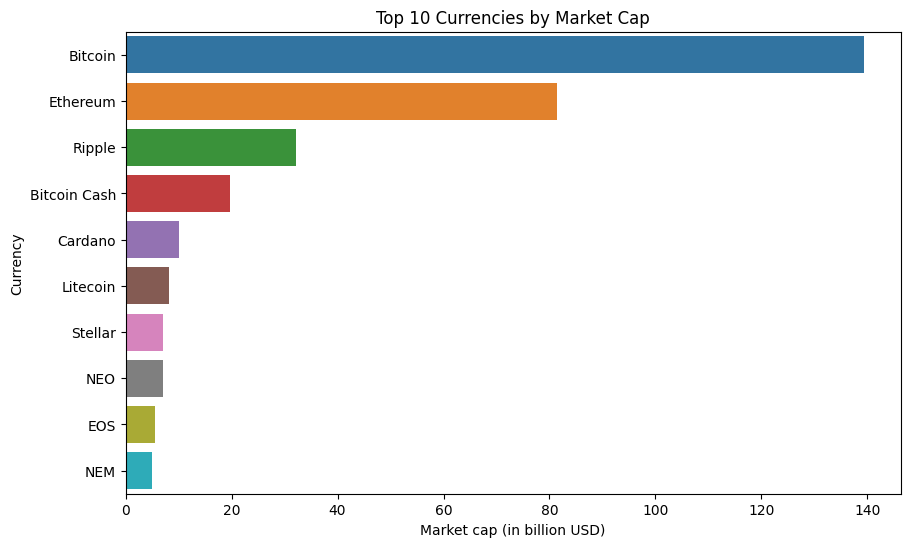

In [ ]:
top_10_marketvalue = df.groupby(['name'])['market_billion'].last().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_marketvalue.values, y=top_10_marketvalue.index, palette='tab10', hue=top_10_marketvalue.index)
plt.xlabel('Market cap (in billion USD)')
plt.ylabel('Currency')
plt.title('Top 10 Currencies by Market Cap')
plt.show();

## Top 10 loại tiền tệ có khối lượng giao dịch cao nhất

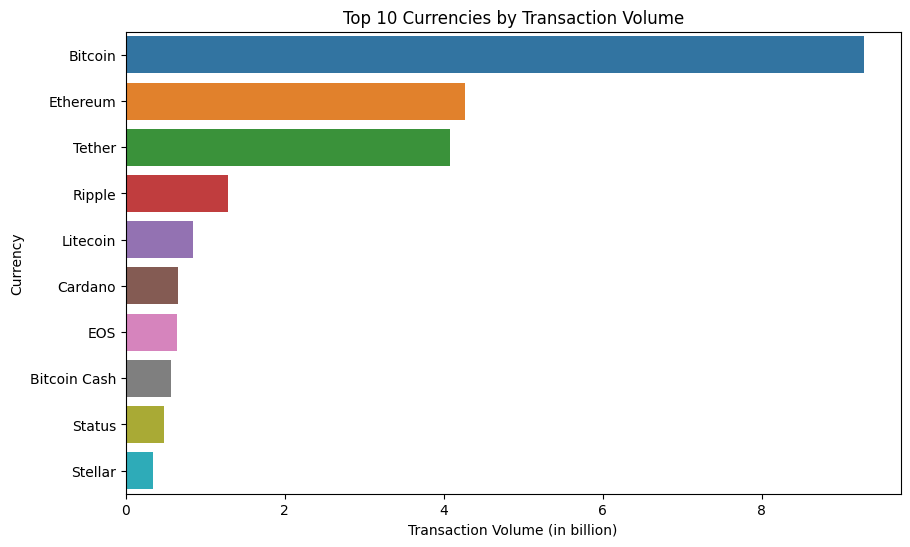

In [ ]:
top_10_volume= df.groupby(['name'])['volume_billion'].last().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_volume.values, y=top_10_volume.index, palette='tab10', hue=top_10_volume.index)
plt.xlabel('Transaction Volume (in billion)')
plt.ylabel('Currency')
plt.title('Top 10 Currencies by Transaction Volume')
plt.show();

In [ ]:
top_5_currency_names = df.groupby(['name'])['market'].last().sort_values(ascending=False).head(5).index
df_top_5_currencies = df[df['name'].isin(top_5_currency_names)]
df_top_5_currencies.head(5)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread,market_billion,volume_billion
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88,1.50052,0.0
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49,1.49116,0.0
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88,1.59778,0.0
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17,1.54282,0.0
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32,1.29219,0.0


In [ ]:
top_5_currency_names

Index(['Bitcoin', 'Ethereum', 'Ripple', 'Bitcoin Cash', 'Cardano'], dtype='object', name='name')

In [ ]:
df_top_5_currencies.describe()

,ranknow,open,high,low,close,volume,market,spread,market_billion,volume_billion
count,4632.000000,4632.000000,4632.000000,4632.000000,4632.000000,4.632000e+03,4.632000e+03,4632.000000,4632.000000,4632.000000
mean,2.147237,606.013877,631.437392,578.401478,607.575753,4.992402e+08,1.324708e+10,53.035771,13.247083,0.499240
std,1.063274,1896.085288,1984.530398,1786.887510,1898.024977,1.848473e+09,3.359528e+10,231.720010,33.595277,1.848473
min,1.000000,0.002809,0.003082,0.002802,0.002810,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,1.000000,0.013997,0.014339,0.013581,0.014022,6.108878e+05,2.557758e+08,0.000000,0.255776,0.000611
50%,2.000000,13.750000,14.265000,13.190000,13.805000,1.752890e+07,3.320160e+09,1.490000,3.320160,0.017529
75%,3.000000,443.000000,452.450000,432.372500,443.385000,1.236690e+08,9.630052e+09,16.600000,9.630052,0.123669
max,5.000000,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11,4110.400000,326.141000,23.840900


## Biểu đồ giá của 5 loại tiền ảo

In [ ]:
df_top_5_close=df_top_5_currencies.groupby(['date', 'name'])['close'].mean().unstack()
data = []
for currency in df_top_5_close.columns:
    trace = go.Scatter(x=df_top_5_close.index, y=df_top_5_close[currency], mode='lines', name=currency)
    data.append(trace)

layout = go.Layout(title=dict(text='Price per unit of currency', x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price per 1 unit (in USD)'),
                   legend=dict(title='Currency'),
                   height=600)

fig = go.Figure(data=data, layout=layout)
pio.show(fig)

## Biểu đồ giá trị vốn hóa thị trường của 5 loại tiền

In [ ]:
df_top_5_market = df_top_5_currencies.groupby(['date', 'name'])['market'].mean().unstack()
data = []
for currency in df_top_5_market.columns:
    trace = go.Scatter(x=df_top_5_market.index, y=df_top_5_market[currency], mode='lines', name=currency)
    data.append(trace)

layout = go.Layout(title=dict(text='Market cap per Currency', x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Market Cap (in billion USD)'),
                   legend=dict(title='Currency'),
                   height=600, width=1000)

fig = go.Figure(data=data, layout=layout)
pio.show(fig)

## Biểu đồ khối lượng giao dịch của 5 loại tiền

In [ ]:
df_top_5_volume = df_top_5_currencies.groupby(['date', 'name'])['volume'].mean().unstack()
data = []
for currency in df_top_5_volume.columns:
    trace = go.Scatter(x=df_top_5_volume.index, y=df_top_5_volume[currency], mode='lines', name=currency)
    data.append(trace)

layout = go.Layout(title=dict(text='Transaction Volume per Currency', x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Transaction Volume'),
                   legend=dict(title='Currency'),
                   height=600, width=1000)

fig = go.Figure(data=data, layout=layout)
pio.show(fig)

#Tỷ lệ lợi nhuận đầu tư theo thời gian

In [ ]:
wide_format = df.groupby(['date', 'name'])['close'].last().unstack()
wide_format.iloc

In [ ]:
wide_format.shape

(1745, 1511)

In [ ]:
def plot_roi(amount, df):
    roi = ((amount / df.iloc[0]) * df)
    # print(df)
    print(df.iloc[0])

    data = []
    for currency in roi.columns:
        trace = go.Scatter(x=roi.index, y=roi[currency], mode='lines', name=currency, hoverinfo='x+y')
        data.append(trace)

    layout = go.Layout(title=dict(text='ROI Comparison of Top Currencies', x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                       xaxis=dict(title='Date'),
                       yaxis=dict(title='ROI (Return on Investment)'),
                       legend=dict(title='Currency'),
                       hovermode='x')
    fig = go.Figure(data=data, layout=layout)
    pio.show(fig)

wide_format_2017 = wide_format.loc['2017-10-01':]
plot_roi(1000, wide_format_2017[top_5_currency_names])

name
Bitcoin         4403.740000
Ethereum         302.340000
Ripple             0.206532
Bitcoin Cash     415.150000
Cardano            0.024969
Name: 2017-10-01 00:00:00, dtype: float64


# Biểu đồ nến

In [ ]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc

## Biểu đồ nến cho loại tiền có thứ hạng là 1

In [ ]:
rank1_currency = df[df['ranknow'] == 1]
name = df[df.ranknow == 1].iloc[-1]['name']
fig = go.Figure(data=[go.Candlestick(x=rank1_currency['date'],
                                     open=rank1_currency['open'],
                                     high=rank1_currency['high'],
                                     low=rank1_currency['low'],
                                     close=rank1_currency['close'])])

fig.update_layout(title=dict(text=name + " price", x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                  xaxis_title='Date',
                  yaxis_title='Price (in USD)',
                  width=1000, height=600,
                  xaxis_rangeslider_visible=False)
pio.show(fig)

Nhận xét trong khoảng thời gian 6 tháng từ 8/2017 đến 2/2018
* Trong khoảng thời gian từ 8/2017 đến đầu tháng 11/2017, giá bitcoin biến đổi tương đối ổn định theo xu hướng tăng.
* Vào khoảng ngày 10/11/2017 thì 14/11/2017 giá bitcoin có một đợt giảm nhẹ sau đó tăng mạnh từ ngày 15/11/2017 đến ngày 16/12/2017 với những thân nến xanh dài thể hiện rằng thị trường có biến động giá lớn với áp lực mua cao, đẩy giá lên cao chạm ngưỡng gần 20000 đô/bitcoin.
* Tuy nhiên từ ngày 17/12/2017 trở đi thì xuất hiện hàng loạt các thân nến đỏ dài cho thấy rằng thị trường có biến động mạnh với áp lục bán cao, giá bitcoin giảm mạnh. Dự báo rằng sau ngày 5/2/2018 thì giá vẫn cần giảm tiếp tục.

# Biểu đồ boxplot của dữ liệu btc

In [ ]:
btc=df[df['symbol']=='BTC']
btc.drop(['slug', 'volume','symbol','name','ranknow','market', 'close_ratio', 'spread', 'market_billion', 'volume_billion'],axis=1,inplace=True)

In [ ]:
btc.set_index('date',inplace = True)

In [ ]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1745 entries, 2013-04-28 to 2018-02-05
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1745 non-null   float64
 1   high    1745 non-null   float64
 2   low     1745 non-null   float64
 3   close   1745 non-null   float64
dtypes: float64(4)
memory usage: 68.2 KB


In [ ]:
btc.head()

,open,high,low,close
date,,,,
2013-04-28,135.30,135.98,132.10,134.21
2013-04-29,134.44,147.49,134.00,144.54
2013-04-30,144.00,146.93,134.05,139.00
2013-05-01,139.00,139.89,107.72,116.99
2013-05-02,116.38,125.60,92.28,105.21


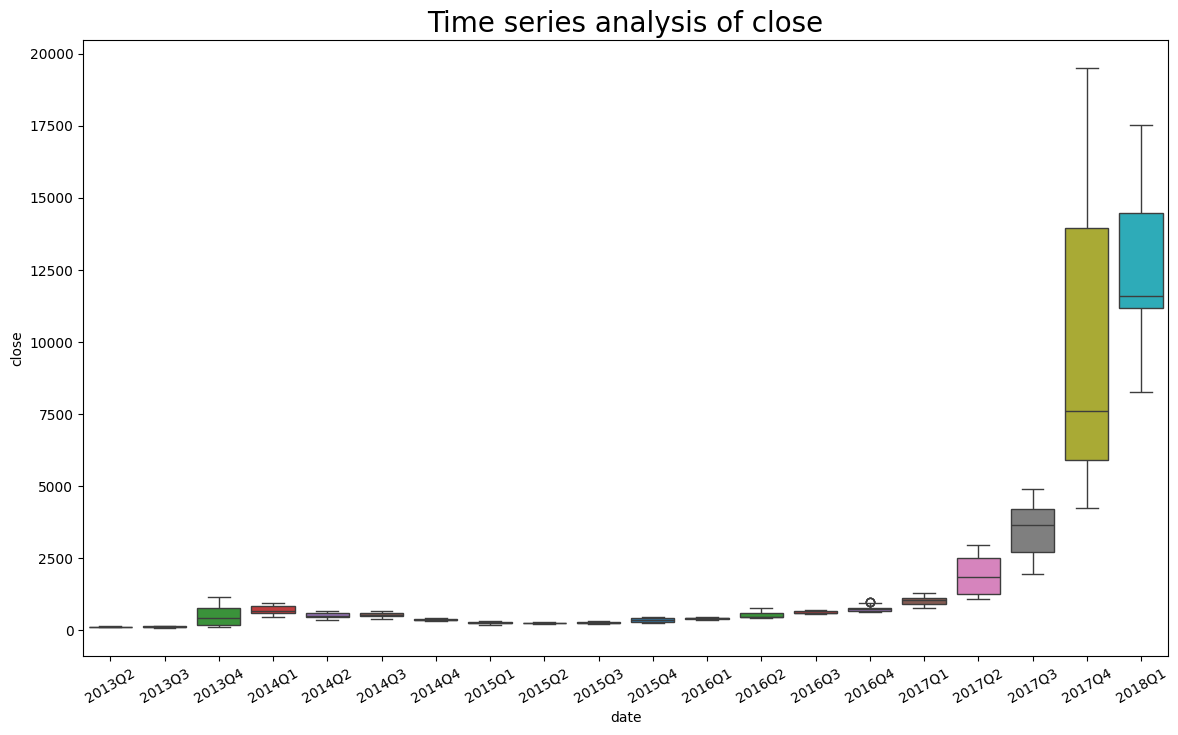

In [ ]:
plt.figure(figsize=(14, 8))
data_subset = btc[btc.index < '2018-02-05']
ax = sns.boxplot(data=data_subset,
                 x=pd.PeriodIndex(data_subset.index, freq='Q'),
                 y=data_subset['close'],
                 hue=pd.PeriodIndex(data_subset.index, freq='Q'), palette='tab10', legend=False)
ax.set_title("Time series analysis of close", fontsize=20)
plt.xticks(rotation=30)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

* Biểu đồ cũng cho thấy sự khác biệt về biến động giữa các quý. Một số quý có biến động rất lớn (ví dụ: Q4 2017, Q1 2018), trong khi một số quý có biến động rất ít (ví dụ: Q2 2015, Q3 2016).
* Có thể thấy sự tương quan giữa giá Bitcoin và các sự kiện quan trọng.
* Giá Bitcoin tăng mạnh vào năm 2017 là do một số chính phủ, tổ chức đã công nhận tính hợp pháp của đồng tiền này (Nhật Bản, Nga, Trung Quốc). link: https://mof.gov.vn/webcenter/portal/vclvcstc/pages_r/l/chi-tiet-tin?dDocName=MOFUCM111006
* Giá Bitcoin giảm mạnh vào đầu năm 2018 là do Chính phủ nhiều nước như Hàn Quốc, Trung Quốc, Mỹ, Nhật Bản, Ấn Độ đã đưa ra những phương án xây dựng quy chế mới thắt chặt quản lý thị trường tiền ảo, khiến tâm lý nhà đầu tư có phần đi xuống.link: https://baochinhphu.vn/vi-sao-gia-bitcoin-roi-tu-do-102234327.htm

#  Phát hiện xu hướng (trend) , mùa vụ (seasonal), resid

Sử dụng mô hình nhân vì tập dữ liệu biến động theo mùa vụ tăng dần theo thời gian

In [ ]:
def plot_seasonal_decomposition(start_idx, end_idx):
    decomposition_multi = seasonal_decompose(btc['close'], model='multiplicative', period=365)

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(14, 8), sharex=True)

    decomposition_multi.observed[start_idx:end_idx].plot(ax=ax1)
    ax1.set_ylabel('Observed')
    decomposition_multi.trend[start_idx:end_idx].plot(ax=ax2)
    ax2.set_ylabel('Trend')
    decomposition_multi.seasonal[start_idx:end_idx].plot(ax=ax3)
    ax3.set_ylabel('Seasonal')
    ax4.scatter(decomposition_multi.resid[start_idx:end_idx].index, decomposition_multi.resid[start_idx:end_idx], marker='o', s=10)
    ax4.set_ylabel('Residual')

    plt.xticks(rotation=45)
    plt.show()

interactive_plot = interactive(plot_seasonal_decomposition,
                               start_idx=widgets.IntSlider(min=0, max=len(btc)-1, step=1, value=0, description='Start'),
                               end_idx=widgets.IntSlider(min=0, max=len(btc)-1, step=1, value=len(btc)-1, description='End'))
interactive_plot

interactive(children=(IntSlider(value=0, description='Start', max=1744), IntSlider(value=1744, description='En…

# Tỷ suất sinh lời

In [ ]:
btc_close = btc['close']
btc_close = pd.DataFrame(btc_close)
btc_close.head()

In [ ]:
#simple return
btc_ret = btc_close.pct_change() # % thay đổi = (giá trị hiện tại - giá trị trước đó) / giá trị trước đó
btc_ret.head()

,close
date,
2013-04-28,NaN
2013-04-29,0.076969
2013-04-30,-0.038328
2013-05-01,-0.158345
2013-05-02,-0.100692


## Biều đồ tỷ suất sinh lời hàng ngày của bitcoin

Tỷ suất sinh lời là tỷ lệ lợi nhuận của việc đầu tư vào một dự án, cổ phiếu hay vấn đề gì đó

In [ ]:
trace = go.Scatter(x=btc_ret.index, y=btc_ret['close'], mode='lines', name='close')

layout = go.Layout(title=dict(text=" Bitcoin Simple Return from 2013-04-29 to 2018-02-05", x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Close'),
                   legend=dict(title=''),
                   width=1000, height=600)

fig = go.Figure(data=[trace], layout=layout)
pio.show(fig)

# Compound Return (Lợi nhuận kép)

## Hàng ngày

In [ ]:
(1+btc_ret).prod()-1

close    50.823784
dtype: float64

Lãi suất kép hàng ngày của bitcoin từ tháng 4/2013 đến 2/2018 là 5082.237%

## Hàng tháng

In [ ]:
btc_m_close = btc_close.resample('M').last()
btc_m_close.head()

,close
date,
2013-04-30,139.00
2013-05-31,129.00
2013-06-30,96.61
2013-07-31,106.09
2013-08-31,135.35


In [ ]:
btc_m_ret = btc_m_close.pct_change()
btc_m_ret.head()

,close
date,
2013-04-30,NaN
2013-05-31,-0.071942
2013-06-30,-0.251085
2013-07-31,0.098126
2013-08-31,0.275804


In [ ]:
btc_comp_m_ret = (1+btc_m_ret).prod()-1
btc_comp_m_ret

close    49.037914
dtype: float64

# Annualized Return (Lợi nhuận hằng năm)

In [ ]:
eth = df[df['symbol']=='ETH']
eth.set_index('date',inplace = True)

In [ ]:
xrp = df[df['symbol']=='XRP']
xrp.set_index('date',inplace = True)

In [ ]:
tickers = {'btc': btc, 'eth': eth, 'xrp': xrp}
stocks = pd.DataFrame()

for ticker, df_close in tickers.items():
    stocks[ticker] = df_close['close']

In [ ]:
stocks.tail()

,btc,eth,xrp
date,,,
2018-02-01,9170.54,1036.79,0.962530
2018-02-02,8830.75,915.78,0.884784
2018-02-03,9174.91,964.02,0.924043
2018-02-04,8277.01,834.68,0.815703
2018-02-05,6955.27,697.95,0.691799


In [ ]:
stock_m = stocks.resample("M").last()
stock_m_ret = stock_m.pct_change()
stock_m_ret.head()

,btc,eth,xrp
date,,,
2013-04-30,NaN,NaN,NaN
2013-05-31,-0.071942,NaN,NaN
2013-06-30,-0.251085,NaN,NaN
2013-07-31,0.098126,NaN,NaN
2013-08-31,0.275804,NaN,NaN


In [ ]:
(1+stock_m_ret).prod()-1

btc     49.037914
eth    512.198529
xrp    121.833629
dtype: float64

## Tính tỷ suất lợi nhuận trung bình hàng tháng

In [ ]:
stock_m_ret.mean()

btc    0.143301
eth    0.369226
xrp    0.396650
dtype: float64

In [ ]:
average_monthly_return = stock_m_ret.mean()
print("Tỷ suất sinh lời trung bình hàng tháng:")
for coin, ret in average_monthly_return.items():
    print(f"{coin}: {ret:.2f}")

Tỷ suất sinh lời trung bình hàng tháng:
btc: 0.14
eth: 0.37
xrp: 0.40


In [ ]:
#lãi suất hàng năm
(1+stock_m_ret.mean())**12-1

btc     3.987983
eth    42.421338
xrp    54.087388
dtype: float64

# Biểu đồ tỷ suất lợi nhuận hàng tháng

In [ ]:
fig = go.Figure()

# Bitcoin
fig.add_trace(go.Scatter(x=stock_m_ret.index, y=stock_m_ret['btc'], mode='lines', name='BTC'))

# Ethereum
fig.add_trace(go.Scatter(x=stock_m_ret.index, y=stock_m_ret['eth'], mode='lines', name='ETH'))

# Ripple
fig.add_trace(go.Scatter(x=stock_m_ret.index, y=stock_m_ret['xrp'], mode='lines', name='XRP'))

fig.update_layout(
    title=dict(text="BTC, ETH, XRP monthly Simple Return from 2013-04 to 2018-02", x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
    xaxis_title="Date",
    yaxis_title="Simple Return",
    legend_title="Cryptocurrencies",
    hovermode='x',
    showlegend=True
)
fig.show()

bán nhiều -> giảm mạnh

# Imvestment Risk(Rủi ro đầu tư)

In [ ]:
#stocks = stocks.dropna()

In [ ]:
days_per_year = stocks.groupby(stocks.index.year).size()

In [ ]:
days_per_year

date
2013    248
2014    365
2015    365
2016    366
2017    365
2018     36
dtype: int64

In [ ]:
stock_log_ret = np.log(stocks/stocks.shift(1)) # giá hnay chia giá hsau
stock_log_ret.tail()

,btc,eth,xrp
date,,,
2018-02-01,-0.108458,-0.075689,-0.186610
2018-02-02,-0.037756,-0.124109,-0.084222
2018-02-03,0.038233,0.051336,0.043415
2018-02-04,-0.102991,-0.144064,-0.124708
2018-02-05,-0.173982,-0.178901,-0.164755


In [ ]:
# để đô lường risk trong đầu tư, chúng ta thường dùng standard deviation
# Tính độ biến động của từng cổ phiếu
btc_std = np.sqrt(stock_log_ret['btc'].var()*365)
eth_std = np.sqrt(stock_log_ret['eth'].var()*365)
xrp_std = np.sqrt(stock_log_ret['xrp'].var()*365)

In [ ]:
print("Độ biến động của BTC, ETH, XRP trong 1 năm")
print(f"Bitcoin: {btc_std}")
print(f"Ethereum: {eth_std}")
print(f"Ripple: {xrp_std}")

Độ biến động của BTC, ETH, XRP trong 1 năm
Bitcoin: 0.855935036630047
Ethereum: 1.6289860559969587
Ripple: 1.5433222483562299


Độ biến động trong 1 năm của Bitcoin là 77%

In [ ]:
#variance
btc_var = stock_log_ret['btc'].var()*365
eth_var = stock_log_ret['eth'].var()*365
xrp_var = stock_log_ret['xrp'].var()*365

In [ ]:
btc_var

0.73262478693088

In [ ]:
stock_log_ret['btc'].mean()*365

0.8262413723182557

In [ ]:
stock_log_ret['eth'].mean()*365

2.2105088209936747

In [ ]:
stock_log_ret['xrp'].mean()*365

1.0571691937825005

Coin nào có tỷ suất sinh lời cao thì độ biến động cao, tỷ suất sinh lời thấp thì tỷ suất sinh lời thấp

# Covariance và Correlation

In [ ]:
#Covariance: so sánh sự liên hệ giữa độ biến động của các coin với nhau
stock_log_ret.cov()*365

,btc,eth,xrp
btc,0.732625,0.351558,0.405496
eth,0.351558,2.653596,0.312747
xrp,0.405496,0.312747,2.381844


In [ ]:
stock_log_ret.corr()

,btc,eth,xrp
btc,1.000000,0.278331,0.308740
eth,0.278331,1.000000,0.124044
xrp,0.308740,0.124044,1.000000


Portfolio Risk
* Có 1 danh mục đầu tư giả sử có 3 coin, tính độ biến động 3 loại coin đó trong 1 danh mục đầu tư đó sẽ như thế nào?


In [ ]:
#Tỷ trọng đầu tư vào từng loại cổ phiếu, giả sử có 1000usd
stock_weight = np.array([0.5, 0.3, 0.2])

In [ ]:
#tính variance của danh mục
port_var = np.dot(stock_weight.T, np.dot(stock_log_ret.cov()*365, stock_weight))
port_var

0.7413497303466787

In [ ]:
port_std = np.sqrt(port_var)
port_std

0.8610166841279434

Độ biến động của cả 1 danh mục khi đầu tư là 82.25%

# Drawdown: phần trăm bị lỗ khi đầu tư

In [ ]:
port_month = stocks.resample('M').last()
port_month.index = port_month.index.to_period('M')
port_monthly_ret = port_month.pct_change() # biến động  (% thay đổi = (giá trị hiện tại - giá trị trước đó) / giá trị trước đó)
port_monthly_ret = port_monthly_ret.dropna()
port_monthly_ret.head()

,btc,eth,xrp
date,,,
2015-09,0.026080,-0.456879,-0.299848
2015-10,0.330890,0.240959,-0.150906
2015-11,0.201006,-0.047465,-0.103691
2015-12,0.141127,0.069204,0.437753
2016-01,-0.143531,1.474447,0.059437


Wealth Index cho biết mức độ tăng trưởng của danh mục đầu tư so với giá trị ban đầu.

In [ ]:
def drawdown(returns):
    # Tính wealth index, giá vốn bắt đầu là 1000USD
    wealth_index = 1000 * (1 + returns).cumprod()
    # Mức giá cao nhất ở thời điểm trước đó
    previous_peaks = wealth_index.cummax()
    # Drawdown
    drawdowns = (wealth_index - previous_peaks) / previous_peaks

    return wealth_index, previous_peaks, drawdowns

btc_wealth, btc_peaks, btc_drawdowns = drawdown(port_monthly_ret['btc'])
#eth_wealth, eth_peaks, eth_drawdowns = drawdown(port_monthly_ret['eth'])
#xrp_wealth, xrp_peaks, xrp_drawdowns = drawdown(port_monthly_ret['xrp'])

fig = go.Figure()

fig.add_trace(go.Scatter(x=btc_drawdowns.index.to_timestamp(), y=btc_drawdowns.values, mode='lines', name='Bitcoin'))
#fig.add_trace(go.Scatter(x=eth_drawdowns.index.to_timestamp(), y=eth_drawdowns.values, mode='lines', name='Ethereum'))
#fig.add_trace(go.Scatter(x=xrp_drawdowns.index.to_timestamp(), y=xrp_drawdowns.values, mode='lines', name='Ripple'))

fig.update_layout(title = dict(text="Phần trăm chịu lỗ khi đầu tư vào BTC từ 9/2015 đến 2/2018", x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                  xaxis_title='Date',
                  yaxis_title='Drawdown',
                  legend_title='Currency',
                  width=1000, height=600,
                  hovermode = 'x')

fig.show()


# Moving Average

## Simple moving average

In [ ]:
#SMA là tính giá trị trung bình, giả sử trong 30 ngày nó tính trung bình của 30 ngày đó với tỉ trọng bằng nhau cho từng ngày
btc_close['20MA'] = btc_close['close'].rolling(20).mean()
btc_close['40MA'] = btc_close['close'].rolling(40).mean()
btc_close['50MA'] = btc_close['close'].rolling(50).mean()
btc_close_subset = btc_close['2017-01-01':'2018-02-05']
close = go.Scatter(x=btc_close.index, y=btc_close['close'], mode='lines', name='Close', line=dict(color='blue'))
ma10 = go.Scatter(x=btc_close.index, y=btc_close['20MA'], mode='lines', name='20MA', line=dict(color='orange'))
ma20 = go.Scatter(x=btc_close.index, y=btc_close['40MA'], mode='lines', name='40MA', line=dict(color='green'))
ma50 = go.Scatter(x=btc_close.index, y=btc_close['50MA'], mode='lines', name='50MA', line=dict(color='red'))

layout = go.Layout(title = dict(text="Moving Averages of Bitcoin", x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                   xaxis=dict(title='Date', tickfont=dict(size=14)),
                   yaxis=dict(title='Price', tickfont=dict(size=14)),
                   legend=dict(x=0.02, y=0.98, font=dict(size=12)),
                   width=1000, height=600)

fig = go.Figure(data=[close, ma10, ma20, ma50], layout=layout)

fig.show()

* Trong một xu hướng tăng mạnh, giá thường nằm trên trung bình động 20 ngày, 20MA nằm trên 40MA và 40MA nằm trên 50MA. Trong một xu hướng giảm mạnh, giá thường nằm dưới trung bình động 20 ngày, 20MA nằm dưới 40MA và 40MA nằm dưới 50MA.
* Chúng ta có thể thấy một xu hướng tăng mạnh từ giữa tháng 11 năm 2017, khi đường giá đóng (close) cắt lên trên đường 20MA, và đến giữa tháng 12 năm 2017, đường giá đóng lại cắt xuống dưới đường 20MA. Sau đó, đường 20MA cũng cắt xuống dưới đường 50MA, báo hiệu cho một xu hướng giảm mạnh.

# Bollinger bands

In [ ]:
btc.head()

,open,high,low,close
date,,,,
2013-04-28,135.30,135.98,132.10,134.21
2013-04-29,134.44,147.49,134.00,144.54
2013-04-30,144.00,146.93,134.05,139.00
2013-05-01,139.00,139.89,107.72,116.99
2013-05-02,116.38,125.60,92.28,105.21
...,...,...,...,...
2018-02-01,10237.30,10288.80,8812.28,9170.54
2018-02-02,9142.28,9142.28,7796.49,8830.75
2018-02-03,8852.12,9430.75,8251.63,9174.91


In [ ]:
import plotly.graph_objects as go

btc['20MA'] = btc['close'].rolling(20).mean()
btc['Upperband'] = btc['20MA'] + 2 * btc['close'].rolling(20).std()
btc['Lowerband'] = btc['20MA'] - 2 * btc['close'].rolling(20).std()
btc['BBWidth'] = btc['Upperband'] - btc['Lowerband']

fig = go.Figure()
# Đường candlestick
fig.add_trace(go.Candlestick(x=btc.index,
                open=btc['open'],
                high=btc['high'],
                low=btc['low'],
                close=btc['close'], name='Close'))
# Đường 20MA
fig.add_trace(go.Scatter(x=btc.index, y=btc['20MA'], mode='lines', name='20MA', line=dict(color='orange', width=1)))
# Upperband và Lowerband
fig.add_trace(go.Scatter(x=btc.index, y=btc['Upperband'], mode='lines', name='Upperband', line=dict(color='blue',width=1)))
fig.add_trace(go.Scatter(x=btc.index, y=btc['Lowerband'], mode='lines', name='Lowerband', line=dict(color='blue', width=1)))
fig.update_layout(title = dict(text="Bollinger Bands of Bitcoin", x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                   xaxis_title='Date',
                   yaxis_title='Price',
                   xaxis_rangeslider_visible=True,
                   showlegend=True, width=1000, height=600, hovermode = 'x')

fig.show()

* Vào đầu tháng 2/2018 thì giá đang có xu hướng giảm xuống dưới đường Lowerband, điều này có ý nghĩa là thị trường đang trong trạng thái quá bán. Khi Bitcoin giảm quá mức như vậy thì có thể trong thời gian tới giá có xu hướng sẽ điều chỉnh tăng trở lại hướng về đường trung bình ở giữa(MA), tuy nhiên thì thị trường vẫn có thể tiếp tục giảm giá tùy vào các yếu tố bên ngoài khác như kinh tế chính trị.
* Dải Bollinger mở rộng cho thấy sự biến động cao của giá Bitcoin trong thời điểm này.

# MACD

In [ ]:
def MACD(df, a, b, c):
    df['MA Fast'] = df['close'].ewm(span=a, min_periods=a).mean()
    df['MA Slow'] = df['close'].ewm(span=b, min_periods=b).mean()
    df['MACD'] = df['MA Fast'] - df['MA Slow']
    df['Signal'] = df['MACD'].ewm(span=c, min_periods=c).mean()

    return df

In [ ]:
btc_macd = MACD(btc, 12, 26, 9)
btc_macd.tail()

,open,high,low,close,20MA,std,Upperband,Lowerband,BBWidth,MA Fast,MA Slow,MACD,Signal,RSI
date,,,,,,,,,,,,,,
2018-02-01,10237.30,10288.80,8812.28,9170.54,11591.2020,1270.599004,14132.400008,9050.003992,5082.396016,10954.873731,11993.575986,-1038.702256,-909.407449,34.828478
2018-02-02,9142.28,9142.28,7796.49,8830.75,11314.7295,1237.527654,13789.784808,8839.674192,4950.110617,10628.085464,11759.292580,-1131.207116,-953.767382,32.204726
2018-02-03,8852.12,9430.75,8251.63,9174.91,11084.8750,1182.815699,13450.506397,8719.243603,4731.262794,10404.520008,11567.856833,-1163.336825,-995.681271,22.831306
2018-02-04,9175.70,9334.87,8031.22,8277.01,10807.7355,1157.360236,13122.455973,8493.015027,4629.440945,10077.210776,11324.090401,-1246.879625,-1045.920941,24.250830
2018-02-05,8270.54,8364.84,6756.68,6955.27,10580.9740,1428.968696,13438.911391,7723.036609,5715.874782,9596.912195,11000.474075,-1403.561880,-1117.449129,22.022137


In [ ]:
# biểu đồ hình nến
trace_candlestick = go.Candlestick(x=btc.index,
                                   open=btc['open'],
                                   high=btc['high'],
                                   low=btc['low'],
                                   close=btc['close'],
                                   name='Candlestick')

# Biểu đồ MACD
trace_macd = go.Scatter(x=btc.index, y=btc['MACD'], mode='lines', name='MACD', line=dict(color='blue', width=1))

# Đường Signal
trace_macd_signal = go.Scatter(x=btc.index, y=btc['Signal'], mode='lines', name='Signal', line=dict(color='orange', width=1))

# Đường zero
trace_macd_zero = go.Scatter(x=btc.index, y=[0] * len(btc), mode='lines', name='Zero Line', line=dict(color='gray', width=1, dash='dash'))

layout = go.Layout(title = dict(text="Candlestick Chart with MACD", x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                   yaxis=dict(title='Price'),
                   yaxis2=dict(title='MACD'),
                   xaxis2=dict(title='Date'))

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.23)

fig.add_trace(trace_candlestick, row=1, col=1)
fig.add_trace(trace_macd, row=2, col=1)
fig.add_trace(trace_macd_signal, row=2, col=1)
fig.add_trace(trace_macd_zero, row=2, col=1)

fig.update_layout(layout)
fig.update_layout(height=700, width=1200)

fig.show()


Trong khoảng thời gian cuối tháng 1/2018 và đầu tháng 2/2018 thì đường MACD bắt chéo và nằm dưới đường Signal cho chúng ta tín hiệu xu hướng giảm trong khoảng thời gian sắp tới từ tháng 2/2018 trở đi và trong thời điểm này thì đường MACD cũng giảm xuống dưới đường zero, củng cố thêm tín hiệu giảm giá trong thời gian sắp tới.

# RSI

In [ ]:
# Tính RSI
def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

btc['close'] = btc['close'].astype(float)
btc['RSI'] = calculate_rsi(btc)

# biểu đồ hình nến
trace_candlestick = go.Candlestick(x=btc.index,
                                   open=btc['open'],
                                   high=btc['high'],
                                   low=btc['low'],
                                   close=btc['close'],
                                   name='Candlestick')

# Biểu đồ RSI
trace_rsi = go.Scatter(x=btc.index, y=btc['RSI'], mode='lines', name='RSI', line=dict(color='blue', width=1))

# Đường ngưỡng RSI
trace_rsi_30 = go.Scatter(x=btc.index, y=[30] * len(btc), mode='lines', name='RSI 30', line=dict(color='green', width=1, dash='dash'))
trace_rsi_50 = go.Scatter(x=btc.index, y=[50] * len(btc), mode='lines', name='RSI 50', line=dict(color='orange', width=1))
trace_rsi_70 = go.Scatter(x=btc.index, y=[70] * len(btc), mode='lines', name='RSI 70', line=dict(color='green', width=1, dash='dash'))

layout = go.Layout(title = dict(text="Candlestick Chart with RSI", x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                   xaxis2=dict(title='Date'),
                   yaxis=dict(title='Price'),
                   yaxis2=dict(title='RSI'))

fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.25)

fig.add_trace(trace_candlestick, row=1, col=1)
fig.add_trace(trace_rsi, row=2, col=1)
fig.add_trace(trace_rsi_30, row=2, col=1)
fig.add_trace(trace_rsi_50, row=2, col=1)
fig.add_trace(trace_rsi_70, row=2, col=1)

fig.update_layout(layout)
fig.update_layout(height=700,width=1200)

fig.show()

Dựa vào biểu đồ RSI, hãy cho biết là Bitcoin hiện tại (5/2/2018) đang trong trạng thái nào (quá bán/quá mua/ổn định)? Phản ánh xu hướng tương lai của Bitcoin là gì?
* Đường RSI hiện tại đang nằm dưới mức 30 cho thấy Bitcoin đang trong trang thái quá bán. Trong các tháng gần nhất, từ cuối tháng 12/2017 đến thời điểm hiện tại đã có tới 3 đợt Bitcoin nằm trong trạng thái quá bán, cho thấy rằng giá Bitcoin đang rất biến động. Nguyên nhân là do có sự can thiệp của chính phủ và thị trường tiền ảo. Phản ánh xu hướng tương lai của Bitcoin là sẽ có sự điều chỉnh tăng giá để ổn định thị trường. Tuy nhiên xu hướng về lâu về dài trong trong năm 2018 có thể sẽ là tiếp tục giảm giá mạnh.

# Kiểm tra tính ổn định và phân tích mùa vụ

## 2013

In [ ]:
btc_stationarity = btc['close']
btc_stationarity = pd.DataFrame(btc_stationarity)
btc_stationarity.head()

,close
date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21


In [ ]:
adf_result = adfuller(btc_stationarity['close'], autolag='AIC')
print('ADF Test Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
print(adf_result[4])
if adf_result[0] < adf_result[4]["5%"]:
  print("Reject Null Hypothesis - Time Series is Stationary")
else:
  print("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Test Statistic: -4.193708
p-value: 0.000675
Critical Values:
{'1%': -3.4341598265624627, '5%': -2.863222825253062, '10%': -2.567665889522738}
Reject Null Hypothesis - Time Series is Stationary


## 2017

In [ ]:
btc_sta_2017 = btc_stationarity['2017-01-01':].copy()
btc_sta_2017.head()

,close
date,
2017-01-01,998.33
2017-01-02,1021.75
2017-01-03,1043.84
2017-01-04,1154.73
2017-01-05,1013.38


In [ ]:
btc_sta_2017['Difference'] = btc_sta_2017['close'].diff(periods=1)
btc_sta_2017 = btc_sta_2017.dropna()

In [ ]:
# Biểu đồ Close
trace_close = go.Scatter(x=btc_sta_2017.index, y=btc_sta_2017['close'], mode='lines', name='Close')

trace_difference = go.Scatter(x=btc_sta_2017.index, y=btc_sta_2017['Difference'], mode='lines', name='First-order difference', line=dict(color='red'))

layout = go.Layout(title = dict(text="Close vs Close with First-order Difference 1/1/2017-5/2/2018", x=0.5, y=0.9, xanchor='center', yanchor='top', font=dict(size=20, color='black')),
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Price'),
                   height=600,width=1000)

fig = go.Figure(data=[trace_close, trace_difference], layout=layout)

fig.show()

In [ ]:
adf_result = adfuller(btc_sta_2017['close'], autolag='AIC')
print('ADF Test Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
print(adf_result[4])
if adf_result[0] < adf_result[4]["5%"]:
  print("Reject Null Hypothesis - Time Series is Stationary")
else:
  print("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Test Statistic: -1.172072
p-value: 0.685493
Critical Values:
{'1%': -3.44753973676872, '5%': -2.8691160516676844, '10%': -2.57080585953957}
Failed to Reject Null Hypothesis - Time Series is Non-Stationary


In [ ]:
adf_result = adfuller(btc_sta_2017['Difference'], autolag='AIC')
print('ADF Test Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
print(adf_result[4])
if adf_result[0] < adf_result[4]["5%"]:
  print("Reject Null Hypothesis - Time Series is Stationary")
else:
  print("Failed to Reject Null Hypothesis - Time Series is Non-Stationary")

ADF Test Statistic: -4.847724
p-value: 0.000044
Critical Values:
{'1%': -3.4474946672686824, '5%': -2.8690962436986855, '10%': -2.570795299750434}
Reject Null Hypothesis - Time Series is Stationary
